# DS Challenge

## Exercise 1

In [2]:
!bzcat data/bookings.csv.bz2 | head -n 10000 >> data/bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = data/bookings.csv.bz2, output file = (stdout)


In [1]:
import bz2

def count_lines(file_path):
    count = 0
    with bz2.BZ2File(file_path, 'r') as file:
        for line in file:
            count += 1
    return count

In [2]:
%%time
count_lines('data/bookings.csv.bz2')

CPU times: user 2min 35s, sys: 426 ms, total: 2min 35s
Wall time: 2min 36s


10000011

In [3]:
%%time
count_lines('data/searches.csv.bz2')

CPU times: user 2min 27s, sys: 356 ms, total: 2min 27s
Wall time: 2min 27s


20390199

## Exercise 2

In [1]:
import pandas as pd
chunksize = 1000
bookings = pd.read_csv('data/bookings.csv.bz2', sep='^', chunksize=chunksize)

In [7]:
df = bookings.read(10000)

In [10]:
df.shape

(10000, 38)

In [40]:
pax_by_airport = df.groupby('arr_port')['pax'].sum()

In [8]:
pax_by_airport.sort_values(ascending=False).head(10)

arr_port
DCA         50
JFK         14
FLL         13
PVG         13
SVO         12
LGA         12
CGK         12
MIA         11
LAS         11
BOS         11
Name: pax, dtype: int64

In [17]:
df.columns = df.columns.str.strip()

In [95]:
def top10_arr_airports_2013(bookings_filepath, chunksize=1e7):
    bookings = pd.read_csv(bookings_filepath, sep='^', usecols=['pax','arr_port', 'year'], chunksize=chunksize)
    total_pax_by_airport = pd.Series([],dtype=int)
    for chunk in bookings:
        year_2013 = chunk[chunk['year'] == 2013]
        pax_by_airport = year_2013.groupby('arr_port')['pax'].sum()
        total_pax_by_airport = total_pax_by_airport.add(pax_by_airport, fill_value=0)
    return total_pax_by_airport.sort_values(ascending=False).head(10)

In [97]:
%%time
top10_arr_airports = top10_arr_airports_2013('data/bookings.csv.bz2')

CPU times: user 2min 57s, sys: 983 ms, total: 2min 58s
Wall time: 2min 58s


In [100]:
#top10_arr_airports.to_csv('output/top10_arr_airports.csv')

In [53]:
# Strip spaces in col. names
df.columns = [col.strip() for col in df.columns]

In [52]:
df.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

## Exercise 3

In [1]:
import pandas as pd
chunksize=1000
searches = pd.read_csv('data/searches.csv.bz2', sep='^', chunksize=chunksize)

In [88]:
sample = searches.read(10000)

In [3]:
sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [4]:
sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [5]:
sample['Destination']

0       AUH
1       MIL
2       SFO
3       ARN
4       MAD
       ... 
9995    LAX
9996    REC
9997    PEK
9998    PAR
9999    CUN
Name: Destination, Length: 10000, dtype: object

In [6]:
cities = ['MAD', 'AGP', 'BCN']

In [11]:
sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [12]:
sample['Date'] = pd.to_datetime(sample['Date'])

In [20]:
sample['Month'] = sample['Date'].dt.month

In [ ]:
cities = sample['']

In [89]:
sample['Date'].apply(lambda x: x.split('-')[1])

10000    01
10001    01
10002    01
10003    01
10004    01
         ..
19995    01
19996    01
19997    01
19998    01
19999    01
Name: Date, Length: 10000, dtype: object

In [30]:
by_month = sample.groupby(['Month', 'Destination'])['Date'].count().reset_index()

In [33]:
madrid = by_month[by_month['Destination'] == 'MAD']

In [71]:
total = pd.DataFrame(columns=['Month', 'Destination', 'Date'])
total

,Month,Destination,Date


In [72]:
total.merge(by_month, how='outer')

,Month,Destination,Date
0,1,AAL,2
1,1,AAQ,1
2,1,ABE,2
3,1,ABJ,2
4,1,ABQ,4
...,...,...,...
1050,1,ZRH,72
1051,1,ZSE,1
1052,1,ZTH,3
1053,1,ZUH,1


In [169]:
def monthly_searches(searches_filepath, chunksize=1e7):
    searches = pd.read_csv(searches_filepath, sep='^', usecols=['Date', 'Destination'], chunksize=chunksize)
    total = pd.DataFrame(columns=['Month', 'Destination', 'Date'])
    for chunk in searches:
        chunk['Month'] = chunk['Date'].apply(lambda x: x.split('-')[1])
        by_month = chunk.groupby(['Month', 'Destination'])['Date'].count().reset_index()
        total = total.merge(by_month, how='outer')
    return total

In [ ]:
%%time
monthly_searches_by_city = monthly_searches('data/searches.csv.bz2')
monthly_searches_by_city

In [158]:
#monthly_searches_by_city.to_csv('output/monthy_searches_by_city.csv')

In [141]:
madrid = monthly_searches_by_city[monthly_searches_by_city['Destination'] == 'MAD'].groupby('Month').sum();
malaga = monthly_searches_by_city[monthly_searches_by_city['Destination'] == 'AGP'].groupby('Month').sum();
barcelona = monthly_searches_by_city[monthly_searches_by_city['Destination'] == 'BCN'].groupby('Month').sum();

In [162]:
madrid.columns = ['searches']
malaga.columns = ['searches']
barcelona.columns = ['searches']

In [163]:
madrid.to_csv('output/madrid.csv')
malaga.to_csv('output/malaga.csv')
barcelona.to_csv('output/barcelona.csv')

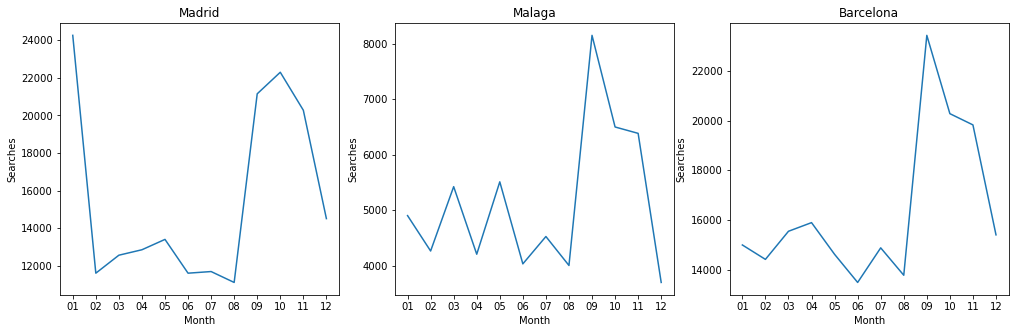

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(17,5))

ax[0].plot(madrid);
ax[1].plot(malaga);
ax[2].plot(barcelona);

ax[0].set_title("Madrid");
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Searches')
ax[1].set_title("Malaga");
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Searches')
ax[2].set_title("Barcelona");
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Searches');